# Simple Linear Regression (SLR)
Simple Linear Regression is a regression model that estimates the relationship between one indpendent variable and one dependent variable using a straight line - both variables should be quantitative.

### Formula
y = b0 + b1*x
* 'y' is the dependent variable
* 'x' is the independent variable
* 'b1' is the slope (rate of change)
* 'b0' is the y-intercept of the line

# Example of Simple Linear Regression

<img src="images/example_slr.png" width="600" height="600" align="center"/>

The line above is the best-fit line using the data set and the linear regression formula
* 'y' is the Salary
* 'x' is the Experience of th Employee
* 'b1' is the slope (rate of change) in salary based on experience of the employee
* 'b0' is the base point, where 'x' (the experience of employees) is equal to 0

# Ordinary Least Squares
A simple linear regression's best-fit line is determined by the "Ordinary Least Squares" method.

<img src="images/ord_least_sq.png" width="600" height="600" align="center"/>

* Point yi indicates the actual point in the data set
* Point yi^ indicates the predicted point in the data set

The best-fit line has the least squared sum distances between yi and yi^.
* The ML model creates multiple lines and compares which line has the least sqaured distances
* The line with the least squared distances is the best-fit line

# SKLearn Linear Regression Model

In [1]:
# ***IMPORTING THE LIBRARIES***
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ***IMPORTING THE DATA SET***
salary_df = pd.read_csv("data/Salary_Data.csv")
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# ***SPLITTING THE DATA SET INTO THE TRAINING AND TESTING SET***
# get 'x' and 'y' data
# 'x' is the years of experience column (represented as a 2D Array for the SKLearn regression model)
# 'y' is the salary column (represented as a 1D Array for the SKLearn regression model)
x = salary_df.iloc[:,:-1].values
y = salary_df.iloc[:,1].values

In [4]:
# split the data set into the training and testing data sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
# ***TRAINING THE SIMPLE LINEAR REGRESSION MODEL ON THE DATA SET***
# import the linear regression class
from sklearn.linear_model import LinearRegression

# create a linear regressor Object, then fit it to the training data
# creates linear regression model
regressor = LinearRegression()

# fit() is the method you use to train your machine learning/deep learning model
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# ***PREDICTING THE TEST SET RESULTS***
y_pred = regressor.predict(x_test)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

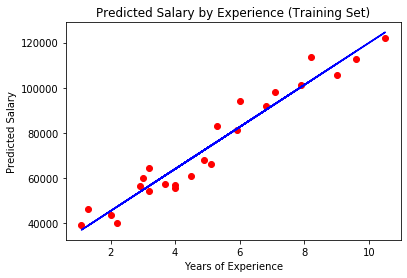

In [8]:
#***VISUALIZING THE TRAINING SET RESULTS***
plt.scatter(x_train, y_train, color = 'red') # real salaries
plt.plot(x_train, regressor.predict(x_train), color = 'blue') # predicted salaries
plt.title('Predicted Salary by Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Predicted Salary')
plt.show()

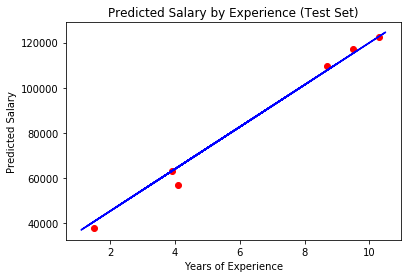

In [9]:
#***VISUALIZING THE TEST SET RESULTS***
plt.scatter(x_test, y_test, color = 'red') # real salaries

# don't need to replace variables for test predicted data since the regression line would be the same as in training data
# this is a result of a unique equation which will make the predicted salaries be on the same regression line as the predicted salaries on the training set
plt.plot(x_train, regressor.predict(x_train), color = 'blue') # predicted salaries
plt.title('Predicted Salary by Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Predicted Salary')
plt.show()

In [10]:
# compare y_pred (prediction) to the y_test (actual)
i = 0
while i < len(y_pred):
    diff = abs(round(y_pred[i]) - y_test[i])
    print("Predicted: " + str(round(y_pred[i])) + " vs Actual: " + str(y_test[i]) +
          " ---> Difference: " + str(diff))
    i += 1

Predicted: 40749.0 vs Actual: 37731.0 ---> Difference: 3018.0
Predicted: 122700.0 vs Actual: 122391.0 ---> Difference: 309.0
Predicted: 64962.0 vs Actual: 57081.0 ---> Difference: 7881.0
Predicted: 63099.0 vs Actual: 63218.0 ---> Difference: 119.0
Predicted: 115250.0 vs Actual: 116969.0 ---> Difference: 1719.0
Predicted: 107800.0 vs Actual: 109431.0 ---> Difference: 1631.0


In [11]:
#***MAKING A SINGLE PREDICTION (i.e. SALARY OF EMPLOYEE WITH 12 YEARS OF EXPERIENCE)***
print(regressor.predict([[12]]))

[138531.00067138]


**Important note:** Notice that the value of the feature (12 years) was input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting 12 into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$12 \rightarrow \textrm{scalar}$

$[12] \rightarrow \textrm{1D array}$

$[[12]] \rightarrow \textrm{2D array}$

In [13]:
#***GETTING THE FINAL LINEAR REGRESSION EQUATION WITH THE VALUES OF THE COEFFICIENTS***
print('Regressor Coefficient (slope):', regressor.coef_)
print('Regressor Intercept (y-intercept):', regressor.intercept_)

Regressor Coefficient (slope): [9312.57512673]
Regressor Intercept (y-intercept): 26780.099150628186


Therefore, the equation of our simple linear regression model is:

$$\textrm{Salary} = 9312.58 \times \textrm{YearsExperience} + 26780.10$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.